In [35]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn import datasets
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn import metrics, linear_model

from warnings import filterwarnings
filterwarnings('ignore')

In [36]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"


columns = [
    'id', 'diagnosis', 'radius1', 'texture1', 'perimeter1','area1', 'smoothness1', 'compactness1','concavity1','concave_points1',
                'symmetry1','fractal_dimension1','radius2','texture2','perimeter2','area2', 'smoothness2','compactness2','concavity2','concave_points2',
                'symmetry2','fractal_dimension2','radius3','texture3','perimeter3','area3','smoothness3','compactness3','concavity3','concave_points3',
                'symmetry3','fractal_dimension3'
]


df = pd.read_csv(url, header=None, names=columns)
df.head()


,id,diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


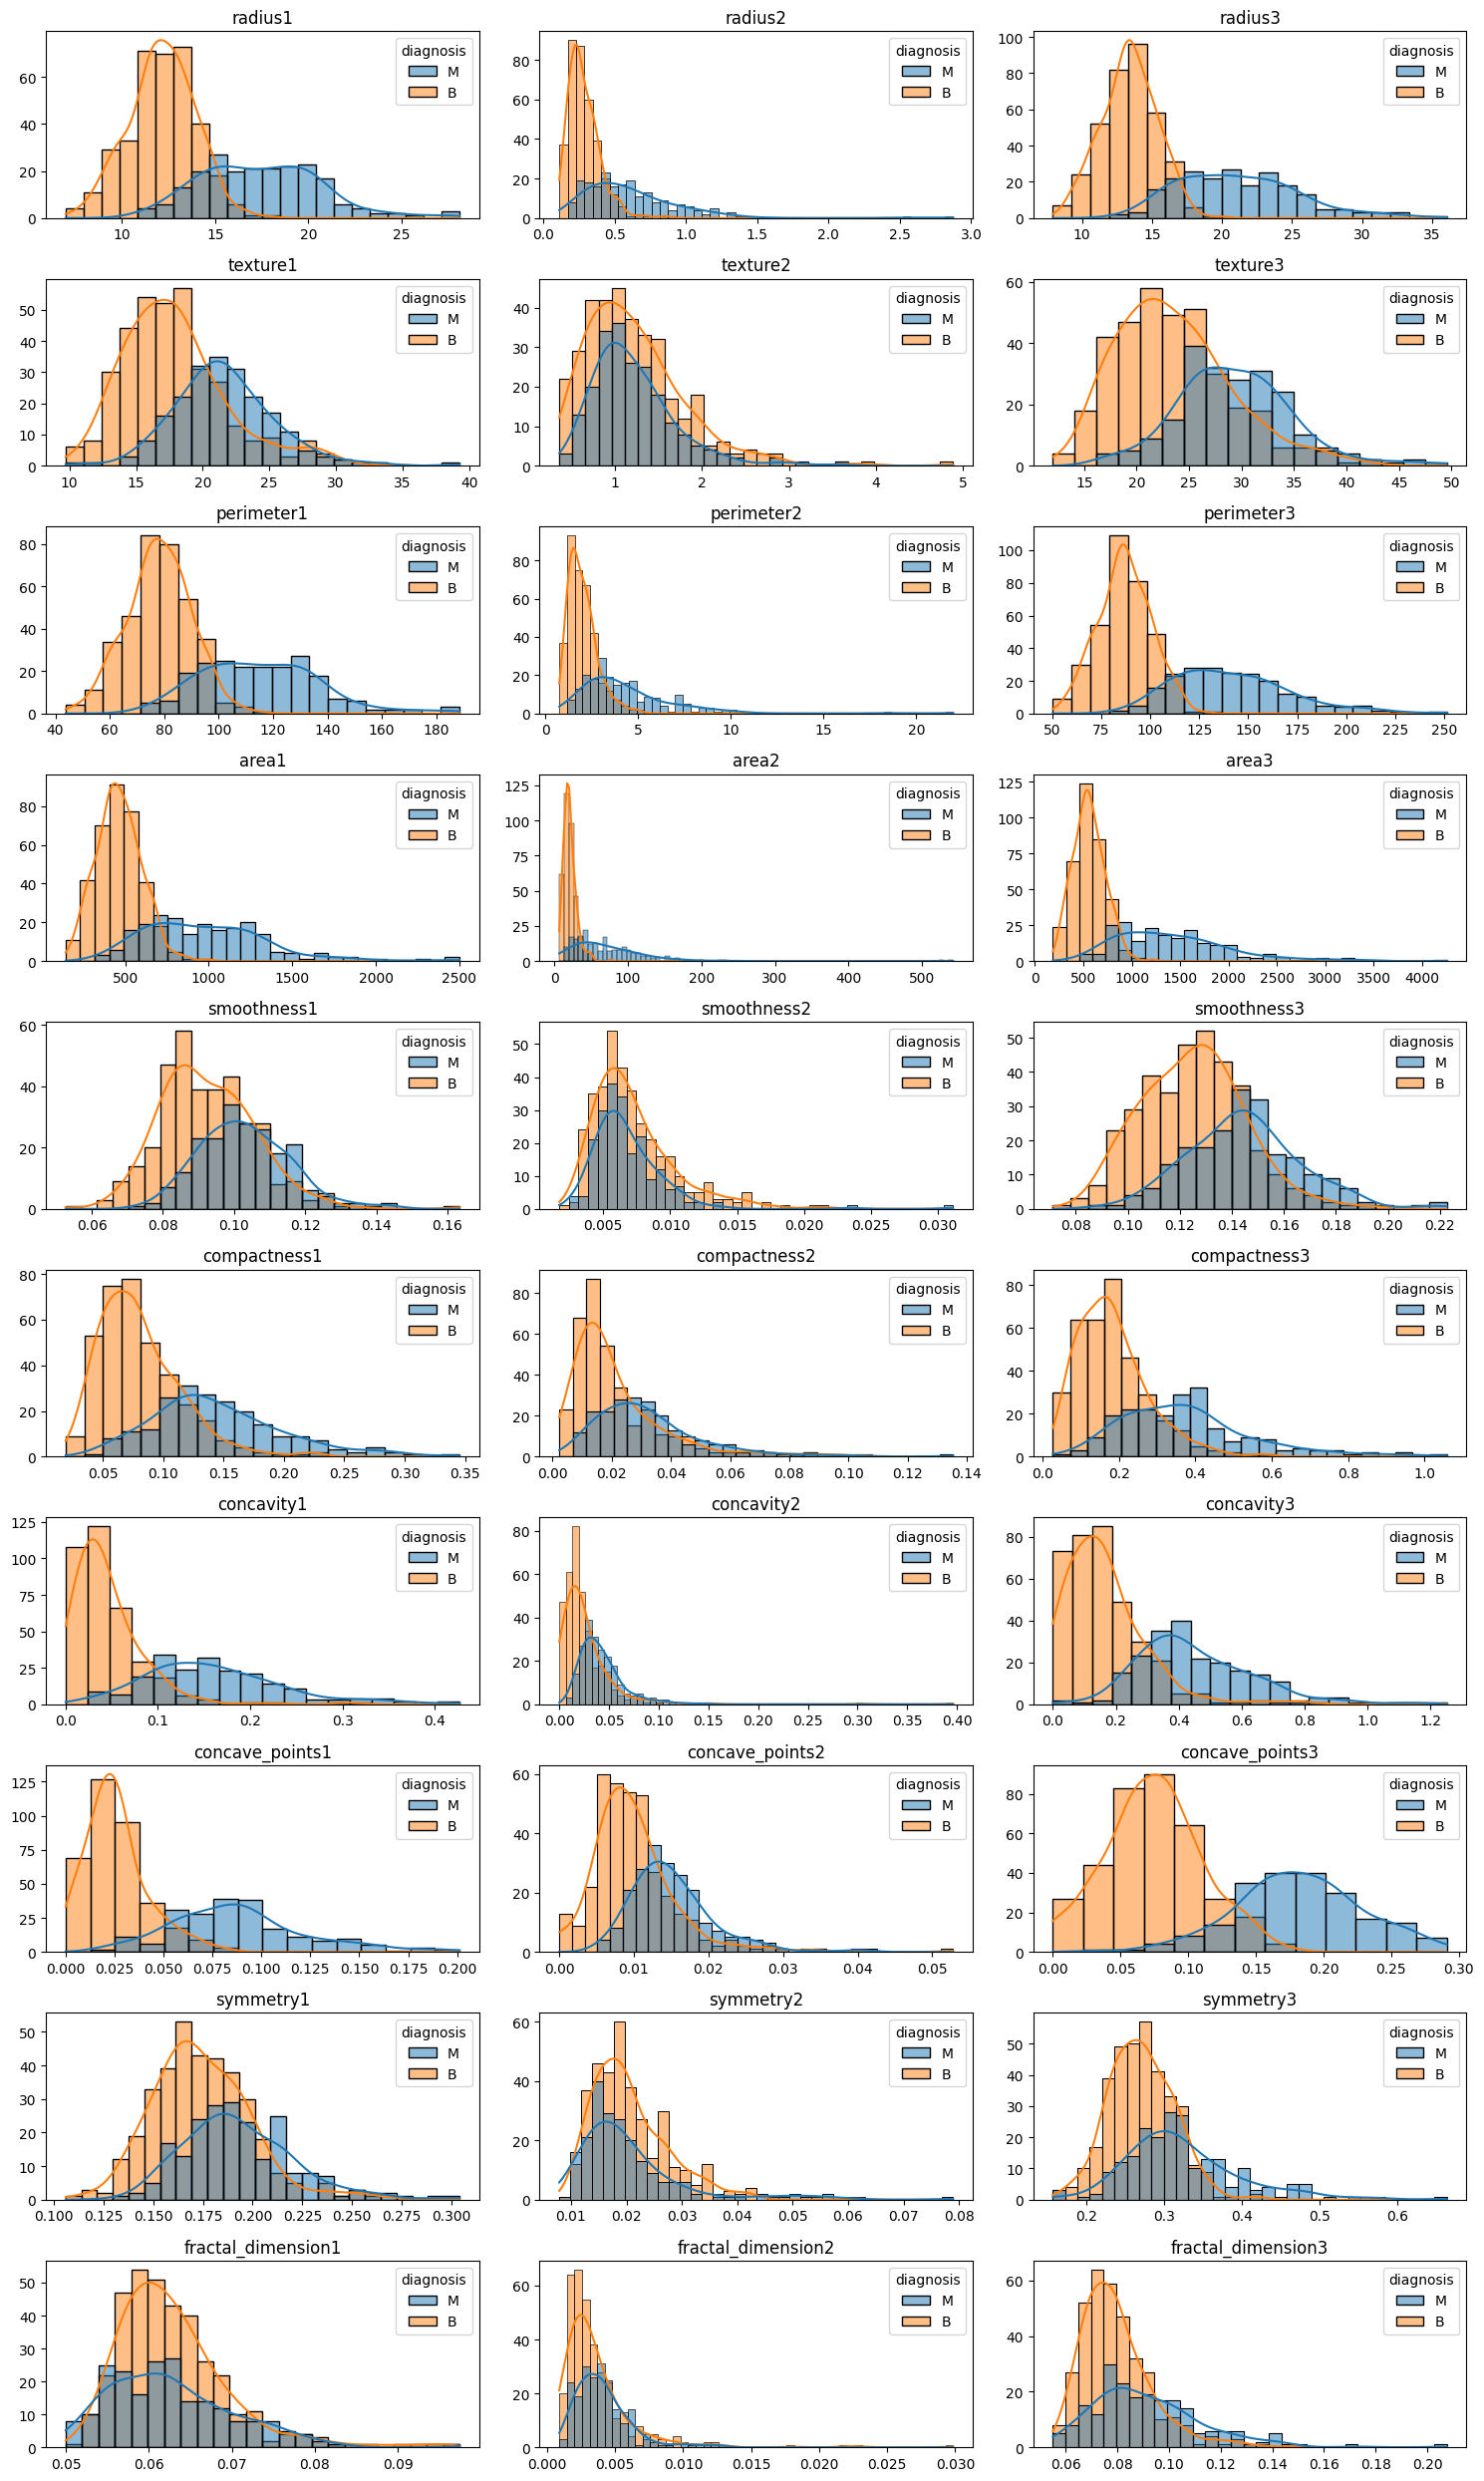

In [37]:
column_groups = [
    ['radius1', 'radius2', 'radius3'],
    ['texture1', 'texture2', 'texture3'],
    ['perimeter1', 'perimeter2', 'perimeter3'],
    ['area1', 'area2', 'area3'],
    ['smoothness1', 'smoothness2', 'smoothness3'],
    ['compactness1', 'compactness2', 'compactness3'],
    ['concavity1', 'concavity2', 'concavity3'],
    ['concave_points1', 'concave_points2', 'concave_points3'],
    ['symmetry1', 'symmetry2', 'symmetry3'],
    ['fractal_dimension1', 'fractal_dimension2', 'fractal_dimension3']
]


fig, axes = plt.subplots(10, 3, figsize=(15, 25))
fig.tight_layout(pad=4.0)


for i, group in enumerate(column_groups):
    for j, col in enumerate(group):
        sns.histplot(data=df, x=col, ax=axes[i, j], hue = 'diagnosis', kde=True, color='skyblue')
        axes[i, j].set_title(col)
        axes[i, j].set_xlabel("")
        axes[i, j].set_ylabel("")


plt.tight_layout()
plt.show()


In [38]:
m_count = df['diagnosis'].str.count('M').sum()
b_count = df['diagnosis'].str.count('B').sum()

print(f"Number of 'M' in diagnosis: {m_count}")
print(f"Number of 'B' in diagnosis: {b_count}")

Number of 'M' in diagnosis: 212
Number of 'B' in diagnosis: 357


t-test and calculate confidence interval

In [39]:
def t_test_with_ci(group1, group2, alpha=0.05):
    test_results = stats.ttest_ind(group1, group2,equal_var=False)
    test_results.confidence_interval(confidence_level=0.95)
    ci_lower = test_results.confidence_interval(confidence_level=0.95).low
    ci_upper = test_results.confidence_interval(confidence_level=0.95).high
    return test_results.statistic, test_results.pvalue, ci_lower, ci_upper

results = []

for group_names in column_groups:
    group_results = []
    for col in group_names:
      group1 = df[df['diagnosis'] == 'M'][col]
      group2 = df[df['diagnosis'] == 'B'][col]
      t_statistic, p_value, ci_lower, ci_upper = t_test_with_ci(group1, group2)
      group_results.append({
          'Column': col,
          'T-statistic': t_statistic,
          'P-value': p_value,
          'CI Lower': ci_lower,
          'CI Upper': ci_upper
      })
    results.extend(group_results)


results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='T-statistic', ascending=False)
results_df

,Column,T-statistic,P-value,CI Lower,CI Upper
23,concave_points3,29.117659,1.061454e-96,0.100513,0.115073
8,perimeter3,25.332210,1.032730e-72,50.138875,58.589909
21,concave_points1,24.844810,3.127316e-71,0.057338,0.067208
2,radius3,24.829745,3.556557e-71,7.140056,8.369964
6,perimeter1,22.935314,1.023141e-66,34.089743,40.490200
0,radius1,22.208798,1.684459e-64,4.845165,5.787448
11,area3,20.570814,4.937924e-54,780.689023,946.084739
18,concavity1,20.332425,3.742121e-58,0.103613,0.125821
9,area1,19.640990,3.284366e-52,463.880511,567.291927
20,concavity3,19.595726,9.852484e-59,0.255830,0.312906


Random Forest Classifier

In [40]:
data = pd.DataFrame(df)


X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,  random_state=32)


rf_model = RandomForestClassifier(n_estimators=100, random_state=32)


rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.99      0.97       107
           M       0.98      0.92      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



In [41]:
print(y_train.str.count('B').sum()/y_train.str.count('M').sum())


1.6891891891891893


In [42]:
print(y_test.str.count('B').sum()/y_test.str.count('M').sum())

1.671875


Confusion Matrix for Random Forest Classifier





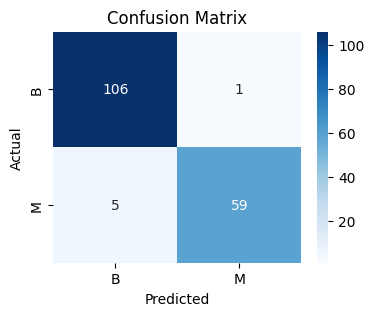

In [43]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Calculating Feature Importances

               Feature  Importance
22          perimeter3    0.147270
23               area3    0.144130
7      concave_points1    0.135878
20             radius3    0.131053
27     concave_points3    0.106782
26          concavity3    0.037506
6           concavity1    0.036615
2           perimeter1    0.036069
0              radius1    0.033196
3                area1    0.021176
12          perimeter2    0.020180
13               area2    0.017775
21            texture3    0.016195
1             texture1    0.014520
24         smoothness3    0.011493
28           symmetry3    0.011031
10             radius2    0.010455
25        compactness3    0.010276
5         compactness1    0.009550
16          concavity2    0.006781
17     concave_points2    0.006336
14         smoothness2    0.005320
29  fractal_dimension3    0.005158
4          smoothness1    0.004590
19  fractal_dimension2    0.004542
11            texture2    0.003882
15        compactness2    0.003621
18           symmetr

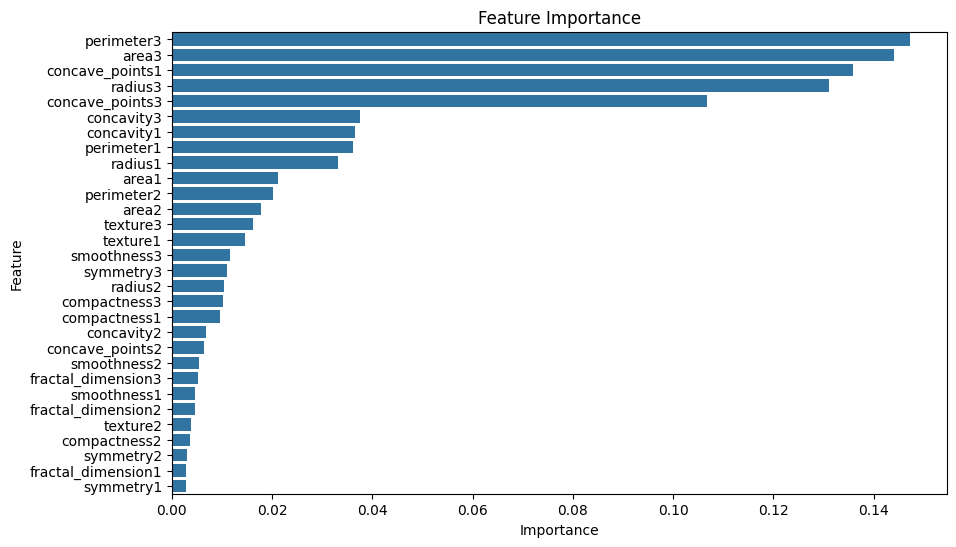

In [44]:
data = pd.DataFrame(df)

X = data.drop(columns=['diagnosis', 'id'])
y = data['diagnosis']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,  random_state=32)


rf_model = RandomForestClassifier(n_estimators=100, random_state=32)


rf_model.fit(X_train, y_train)

feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


print(feature_importance_df)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


Decision Tree Classifier

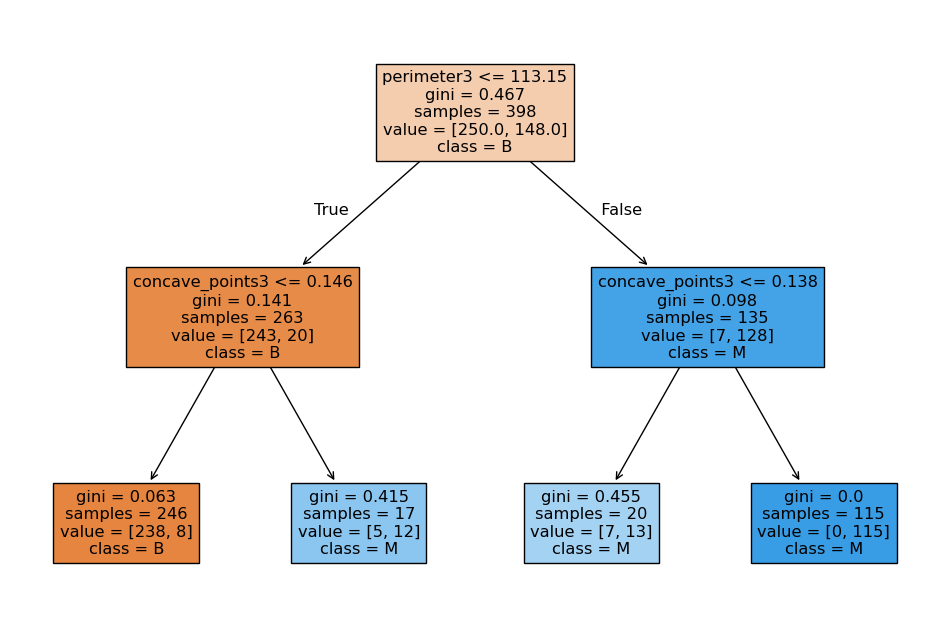

In [45]:
clf = DecisionTreeClassifier(max_depth=2, random_state=32)


features = ['perimeter3', 'area3', 'concave_points1', 'radius3', 'concave_points3']
X_train_selected = X_train[features]

clf = clf.fit(X_train_selected, y_train)


plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=features, class_names=['B', 'M'], filled=True)
plt.show()

Confusion Matrix for Decision Tree Classifier

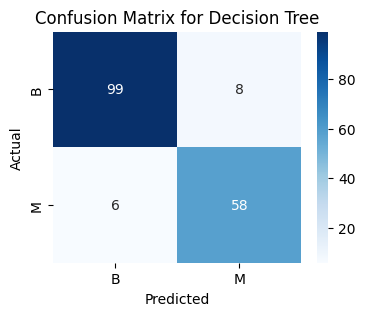

In [46]:
features = ['perimeter3', 'area3', 'concave_points1', 'radius3', 'concave_points3']
X_test_selected = X_test[features]
y_pred = clf.predict(X_test_selected)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

Decision classification report

In [47]:
print("Accuracy Score:", accuracy_score(y_test, clf.predict(X_test_selected)))
print(classification_report(y_test, clf.predict(X_test_selected)))


Accuracy Score: 0.9181286549707602
              precision    recall  f1-score   support

           B       0.94      0.93      0.93       107
           M       0.88      0.91      0.89        64

    accuracy                           0.92       171
   macro avg       0.91      0.92      0.91       171
weighted avg       0.92      0.92      0.92       171



Logistic Regression model - - Using 5 features

Optimization terminated successfully.
         Current function value: 0.109268
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  398
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                            5
Date:                Fri, 10 Jan 2025   Pseudo R-squ.:                  0.8344
Time:                        02:37:54   Log-Likelihood:                -43.489
converged:                       True   LL-Null:                       -262.66
Covariance Type:            nonrobust   LLR p-value:                 1.613e-92
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.6546      8.060     -0.205      0.837     -17.452      14.142
perimeter3   

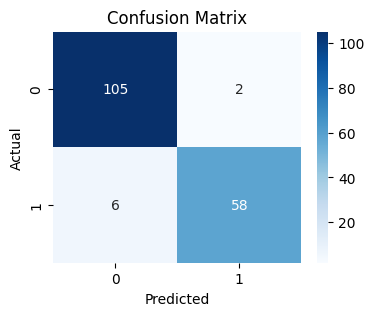

In [48]:

features = ['perimeter3', 'area3', 'concave_points1', 'radius3', 'concave_points3']
X_train_selected = X_train[features]
X_test_selected = X_test[features]


X_train_selected = sm.add_constant(X_train_selected)
X_test_selected = sm.add_constant(X_test_selected)

y_train_numeric = y_train.map({'B': 0, 'M': 1})


logreg_model = sm.Logit(y_train_numeric, X_train_selected).fit()


print(logreg_model.summary())


y_pred = logreg_model.predict(X_test_selected)


y_pred_class = (y_pred > 0.5).astype(int)


y_test_numeric = y_test.map({'B': 0, 'M': 1})


print("Accuracy Score:", accuracy_score(y_test_numeric, y_pred_class))
print("\nClassification Report:\n", classification_report(y_test_numeric, y_pred_class))

cm = confusion_matrix(y_test_numeric, y_pred_class)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

 Logistic Regression model - Using 2 features

Optimization terminated successfully.
         Current function value: 0.112986
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  398
Model:                          Logit   Df Residuals:                      395
Method:                           MLE   Df Model:                            2
Date:                Fri, 10 Jan 2025   Pseudo R-squ.:                  0.8288
Time:                        02:37:58   Log-Likelihood:                -44.968
converged:                       True   LL-Null:                       -262.66
Covariance Type:            nonrobust   LLR p-value:                 2.882e-95
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -15.1198      2.206     -6.855      0.000     -19.443     -10.797
area3        

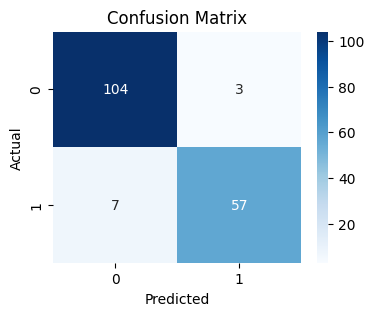

In [49]:
features = ['area3', 'concave_points3']
X_train_selected = X_train[features]
X_test_selected = X_test[features]


X_train_selected = sm.add_constant(X_train_selected)
X_test_selected = sm.add_constant(X_test_selected)

y_train_numeric = y_train.map({'B': 0, 'M': 1})


logreg_model = sm.Logit(y_train_numeric, X_train_selected).fit()


print(logreg_model.summary())


y_pred = logreg_model.predict(X_test_selected)


y_pred_class = (y_pred > 0.5).astype(int)


y_test_numeric = y_test.map({'B': 0, 'M': 1})



print("Accuracy Score:", accuracy_score(y_test_numeric, y_pred_class))
print("\nClassification Report:\n", classification_report(y_test_numeric, y_pred_class))


cm = confusion_matrix(y_test_numeric, y_pred_class)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Receiver Operating Characteristic (ROC) curve

Threshold: inf, F1-score: 0.00
Threshold: 1.00, F1-score: 0.00
Threshold: 0.82, F1-score: 0.88
Threshold: 0.81, F1-score: 0.89
Threshold: 0.70, F1-score: 0.91
Threshold: 0.62, F1-score: 0.92
Threshold: 0.51, F1-score: 0.92
Threshold: 0.50, F1-score: 0.93
Threshold: 0.48, F1-score: 0.93
Threshold: 0.47, F1-score: 0.93
Threshold: 0.46, F1-score: 0.92
Threshold: 0.38, F1-score: 0.93
Threshold: 0.32, F1-score: 0.93
Threshold: 0.10, F1-score: 0.91
Threshold: 0.09, F1-score: 0.90
Threshold: 0.00, F1-score: 0.67
Threshold: 0.00, F1-score: 0.67
Threshold: 0.00, F1-score: 0.55


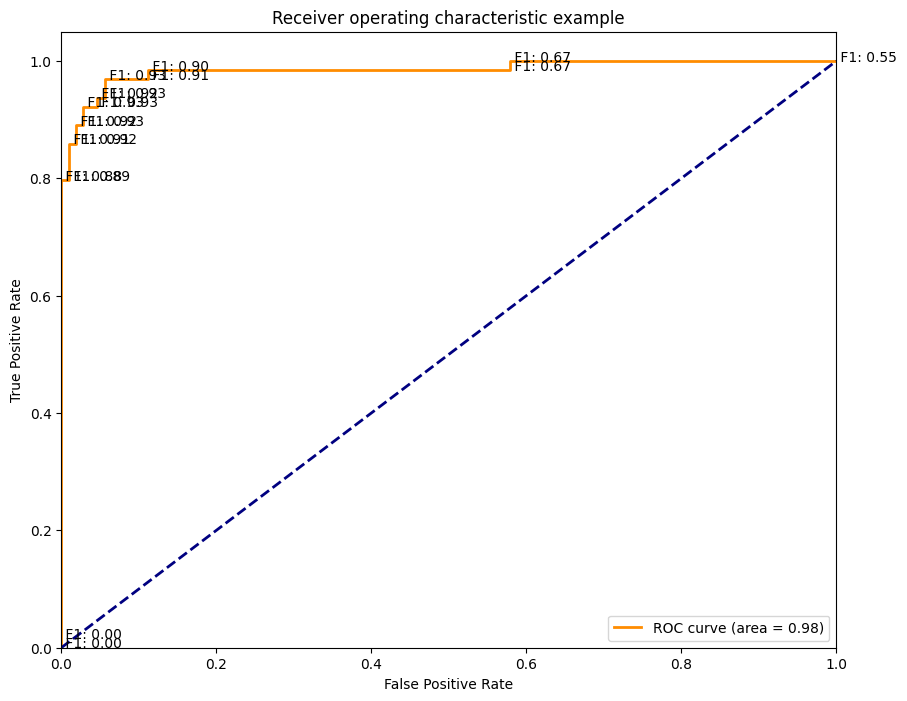

In [50]:
from sklearn.metrics import roc_curve, auc, f1_score



fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred)
roc_auc = auc(fpr, tpr)


f1_scores = []
for threshold in thresholds:
    y_pred_class = (y_pred > threshold).astype(int)
    f1 = f1_score(y_test_numeric, y_pred_class)
    f1_scores.append(f1)


for i, threshold in enumerate(thresholds):
    print(f"Threshold: {threshold:.2f}, F1-score: {f1_scores[i]:.2f}")


plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

for i, threshold in enumerate(thresholds):
    plt.annotate(f" F1: {f1_scores[i]:.2f}", (fpr[i], tpr[i]))

plt.show()

Logistic Regression model - Using 2 features (using 0.32 as the threshold )

Optimization terminated successfully.
         Current function value: 0.112986
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  398
Model:                          Logit   Df Residuals:                      395
Method:                           MLE   Df Model:                            2
Date:                Fri, 10 Jan 2025   Pseudo R-squ.:                  0.8288
Time:                        02:35:41   Log-Likelihood:                -44.968
converged:                       True   LL-Null:                       -262.66
Covariance Type:            nonrobust   LLR p-value:                 2.882e-95
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -15.1198      2.206     -6.855      0.000     -19.443     -10.797
area3        

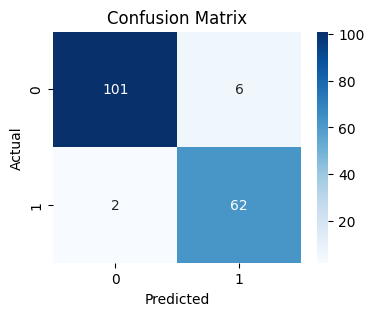

In [34]:
features = ['area3', 'concave_points3']
X_train_selected = X_train[features]
X_test_selected = X_test[features]


X_train_selected = sm.add_constant(X_train_selected)
X_test_selected = sm.add_constant(X_test_selected)

y_train_numeric = y_train.map({'B': 0, 'M': 1})


logreg_model = sm.Logit(y_train_numeric, X_train_selected).fit()


print(logreg_model.summary())


y_pred = logreg_model.predict(X_test_selected)


y_pred_class = (y_pred > 0.32).astype(int)


y_test_numeric = y_test.map({'B': 0, 'M': 1})



print("Accuracy Score:", accuracy_score(y_test_numeric, y_pred_class))
print("\nClassification Report:\n", classification_report(y_test_numeric, y_pred_class))


cm = confusion_matrix(y_test_numeric, y_pred_class)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()